In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [53]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [67]:
x_test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [69]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

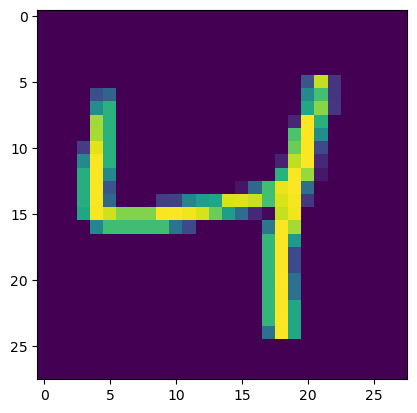

In [56]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
x_train=x_train/255
x_test=x_test/255

In [59]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [60]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [61]:
model=tf.keras.models.Sequential()

#Add 1st input layer
model.add(keras.layers.Flatten(
                             input_shape=(28,28)))
#Add hiddennlayer
model.add(keras.layers.Dense(50, activation='relu'))

#Add output layer
model.add(keras.layers.Dense(10, activation='softmax'))

#compile the model with loss and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary() #complete details

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 50)                39250     
                                                                 
 dense_12 (Dense)            (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3510 - accuracy: 0.9013 - val_loss: 0.2023 - val_accuracy: 0.9417
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1768 - accuracy: 0.9484 - val_loss: 0.1569 - val_accuracy: 0.9542
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.1342 - val_accuracy: 0.9606
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1068 - accuracy: 0.9679 - val_loss: 0.1248 - val_accuracy: 0.9637
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0893 - accuracy: 0.9729 - val_loss: 0.1130 - val_accuracy: 0.9671
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.1166 - val_accuracy: 0.9665
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0652 - accuracy: 0.9803 - val_loss: 0.1083 - val_accuracy:

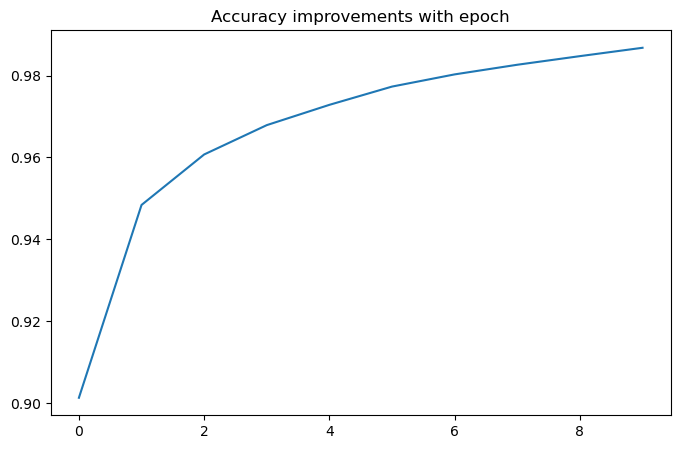

313/313 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9738


[0.08785495162010193, 0.973800003528595]

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
#fit model
history=model.fit(x_train,y_train,epochs=10,verbose=1,validation_split=0.2)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy improvements with epoch')
plt.show()
model.evaluate(x_test,y_test)

# Predictions

In [66]:
prediction_input=x_test[1].reshape(1,28,28)
prediction_output=model.predict(prediction_input)
print('Raw_Predictions = ',prediction_output)

import numpy as np
prediction=np.argmax(prediction_output) #to get index of highest prediction
print("Predicted value is ",prediction )

1/1 [==============================] - 0s 97ms/step
Raw_Predictions =  [[1.1259637e-11 3.2623445e-03 9.9673635e-01 1.2531631e-06 6.4784128e-18
  1.4536924e-09 1.0695533e-09 1.1350955e-15 3.6599832e-08 2.8005639e-13]]
Predicted value is  2


In [45]:
x_test[1].shape

(28, 28)

In [50]:
x_test[1].reshape(1,28,28)

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.